In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from candlesticks import barplot

In [3]:
nq = pd.read_pickle('minute_NQ_cont_non_active_included.pickle')
nq.head()

,open,high,low,close,volume,average,barCount
date,,,,,,,
2016-12-01 07:26:00,4818.0,4818.0,4818.0,4818.0,5,4818.0,4
2016-12-01 07:27:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:28:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:29:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:30:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0


In [4]:
nq.describe()

,open,high,low,close,volume,average,barCount
count,887853.000000,887853.000000,887853.000000,887853.000000,887853.000000,887853.000000,887853.000000
mean,6716.392425,6717.406032,6715.376979,6716.394245,265.924575,6716.392849,139.156117
std,747.486336,747.792122,747.182925,747.487357,523.838464,747.487589,266.590693
min,4818.000000,4818.000000,4818.000000,4818.000000,0.000000,4818.000000,0.000000
25%,6058.250000,6059.000000,6057.250000,6058.250000,16.000000,6058.175000,11.000000
50%,6823.500000,6824.750000,6822.250000,6823.500000,59.000000,6823.425000,37.000000
75%,7364.250000,7365.250000,7363.000000,7364.250000,254.000000,7364.225000,134.000000
max,8044.500000,8051.750000,8042.250000,8044.750000,17549.000000,8045.125000,6643.000000


In [5]:
nq.head()

,open,high,low,close,volume,average,barCount
date,,,,,,,
2016-12-01 07:26:00,4818.0,4818.0,4818.0,4818.0,5,4818.0,4
2016-12-01 07:27:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:28:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:29:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0
2016-12-01 07:30:00,4818.0,4818.0,4818.0,4818.0,0,4818.0,0


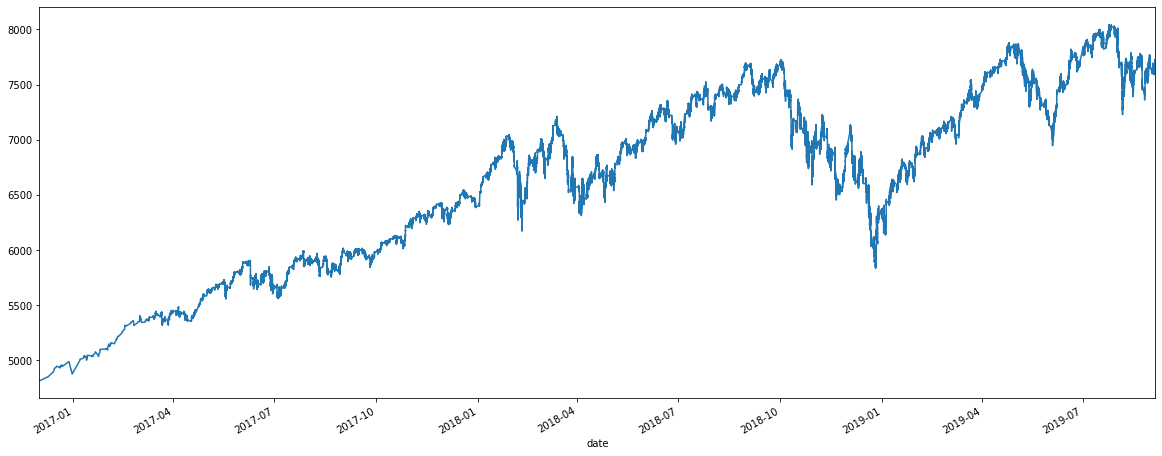

In [6]:
nq.close.plot(figsize=(20,8));

In [7]:
data = pd.DataFrame(nq.close)
data['max'] = data.close.rolling(200).max()
data['min'] = data.close.rolling(200).min()
data['ema'] = data.close.rolling(2000).mean()
#data['mean'] = (data['max'] + data['min']) / 2
#data['indicator'] = (data['close'] - data['mean']) / (data['max'] - data['min'])

data.tail()

,close,max,min,ema
date,,,,
2019-09-04 18:27:00,7695.00,7703.75,7668.25,7652.563250
2019-09-04 18:28:00,7695.00,7703.75,7668.25,7652.593375
2019-09-04 18:29:00,7695.00,7703.75,7668.25,7652.623375
2019-09-04 18:30:00,7697.50,7703.75,7668.25,7652.654500
2019-09-04 18:31:00,7697.25,7703.75,7668.25,7652.685250


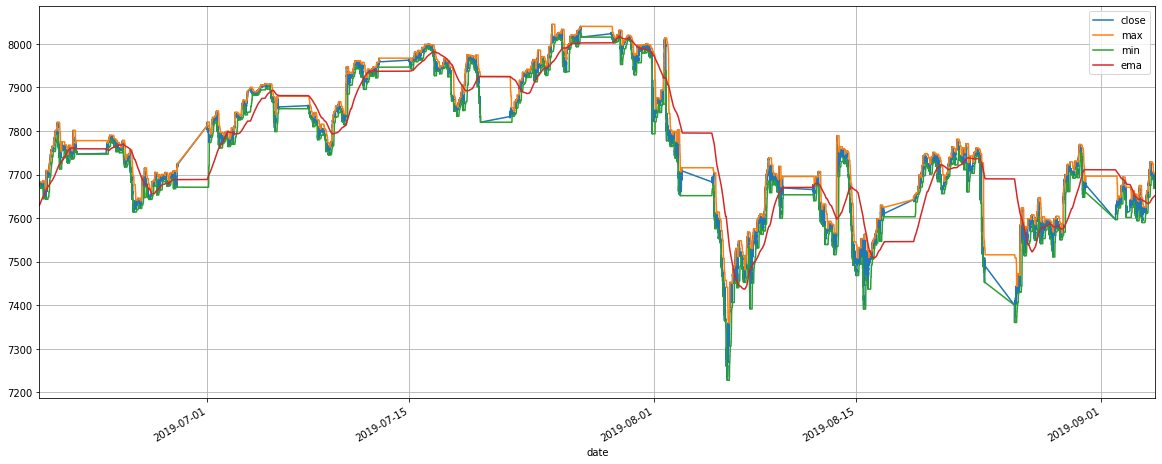

In [8]:
data[-75000:].plot(figsize=(20,8), grid=True);

In [9]:
avg_vol = nq.loc['20190621':].volume.rolling(30).sum().mean()
avg_vol

9916.21218117854

9039.909273460536


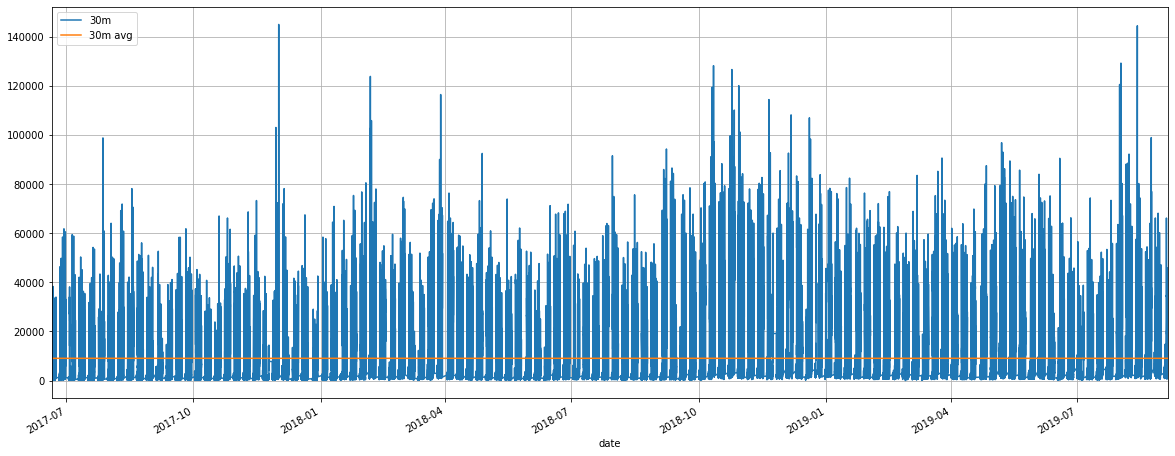

In [10]:
time_int = 30
df = nq.loc['20170621':]
avg = df.volume.rolling(time_int).sum().mean()
volume_df = pd.DataFrame({
    '{}m'.format(time_int): df.volume.rolling(time_int).sum(),
    '{}m avg'.format(time_int): avg,
})
print(avg)
volume_df.plot(figsize=(20, 8), grid=True);

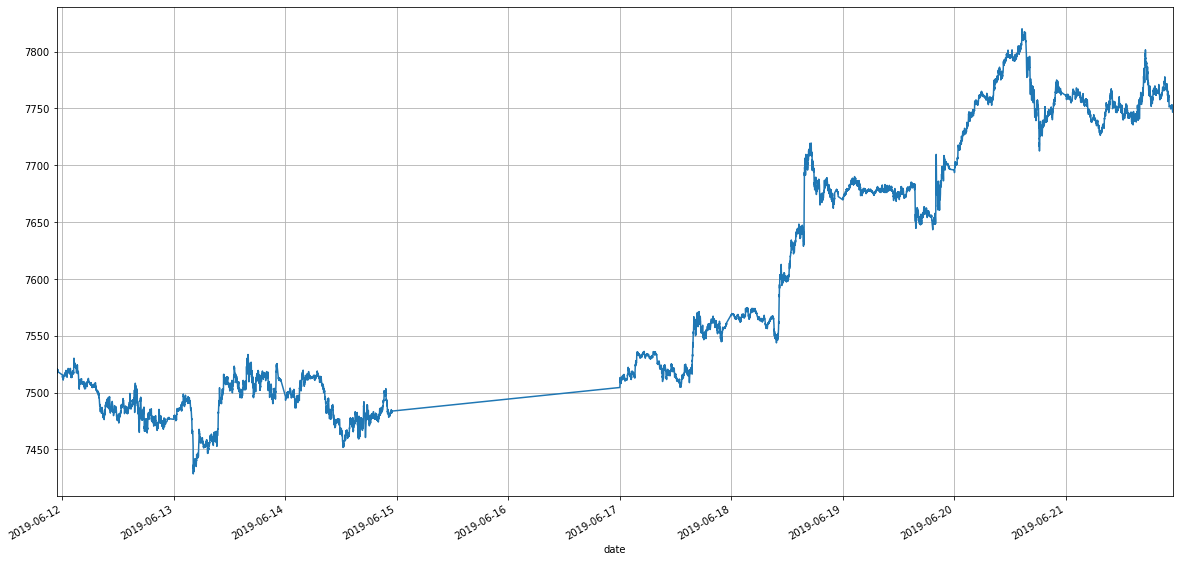

In [11]:
 nq.loc['20190611 22:45:00':'20190621'].close.plot(figsize=(20,10),grid=True);

In [12]:
class VolumeGrouper:
    def __init__(self, avg_vol):
        self.volume = 0
        self.counter = 0
        self.avg_vol = avg_vol
    def group(self, vol):
        self.volume += vol
        if self.volume >= self.avg_vol:
            self.volume -= self.avg_vol
            self.counter += 1
        return self.counter

In [13]:
vol_candles = nq.copy().reset_index()
grouper = VolumeGrouper(avg_vol)
vol_candles['label'] = vol_candles.volume.apply(grouper.group)

In [14]:
vol_candles = vol_candles.groupby('label').agg({'date': 'last',
                                  'open': 'first',
                                 'high': 'max',
                                 'low': 'min',
                                 'close': 'last',
                                 'volume': 'sum'})

In [15]:
#vol_candles.set_index('date', inplace=True)

In [16]:
vol_candles.head()

,date,open,high,low,close,volume
label,,,,,,
0,2017-05-25 05:11:00,4818.00,5758.50,4818.00,5754.50,9916
1,2017-06-06 14:47:00,5756.00,5897.75,5746.75,5877.25,9911
2,2017-06-07 20:10:00,5877.50,5900.25,5853.50,5883.75,9909
3,2017-06-08 15:33:00,5883.00,5905.75,5876.75,5895.25,9448
4,2017-06-08 15:54:00,5895.25,5898.75,5868.25,5875.75,10166


In [17]:
data = pd.DataFrame(vol_candles.close)
data['max'] = data.close.rolling(20).max()
data['min'] = data.close.rolling(20).min()
data['ema_fast'] = data.close.ewm(span=80).mean()
data['ema_slow'] = data.close.ewm(span=480).mean()
#data.reset_index(drop=True, inplace=True)
data.tail()

,close,max,min,ema_fast,ema_slow
label,,,,,
23805,7682.25,7725.50,7671.75,7659.210960,7635.737972
23806,7696.00,7725.50,7671.75,7660.119331,7635.988542
23807,7700.00,7725.50,7671.75,7661.104039,7636.254702
23808,7700.25,7718.50,7671.75,7662.070606,7636.520795
23809,7697.25,7702.25,7671.75,7662.939233,7636.773307


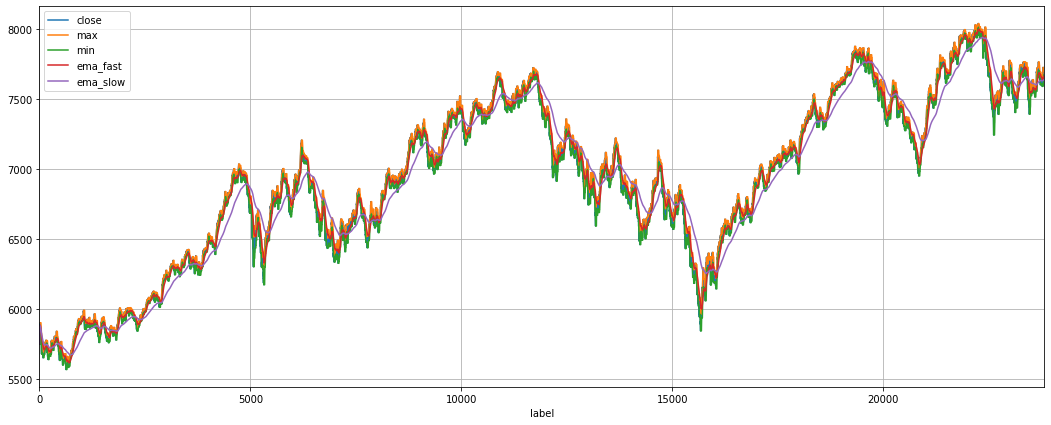

In [18]:
data.plot(figsize=(18,7), grid=True);

In [19]:
ema_diff = pd.DataFrame({'close': data['close'], 'ema_diff': data['ema_fast'] - data['ema_slow']})
ema_diff['return'] = ema_diff['close'].pct_change()
ema_diff['std'] = ema_diff['return'].expanding().std()
ema_diff['price_std'] = ema_diff['std'] * ema_diff['close']
ema_diff['norm'] = ema_diff['ema_diff']/ema_diff['price_std']
ema_diff['zscore'] = (ema_diff['ema_diff'] - ema_diff['ema_diff'].expanding().mean()) / ema_diff['ema_diff'].expanding().std()
#ema_diff['max']

In [20]:
ema_diff.tail()

,close,ema_diff,return,std,price_std,norm,zscore
label,,,,,,,
23805,7682.25,23.472987,0.000033,0.001752,13.455939,1.744433,0.080567
23806,7696.00,24.130789,0.001790,0.001752,13.480031,1.790114,0.087416
23807,7700.00,24.849337,0.000520,0.001752,13.486778,1.842496,0.094899
23808,7700.25,25.549811,0.000032,0.001751,13.486933,1.894412,0.102193
23809,7697.25,26.165926,-0.000390,0.001751,13.481410,1.940889,0.108609


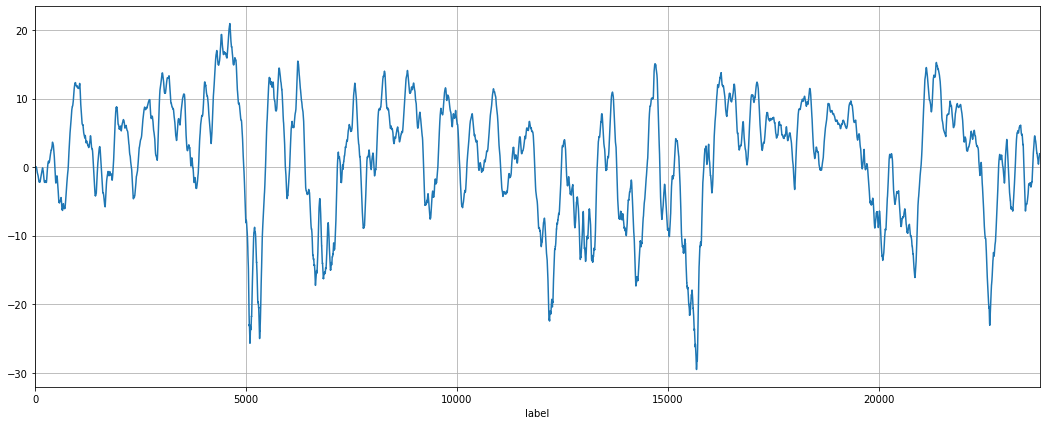

In [21]:
ema_diff['norm'].plot(figsize=(18,7), grid=True);

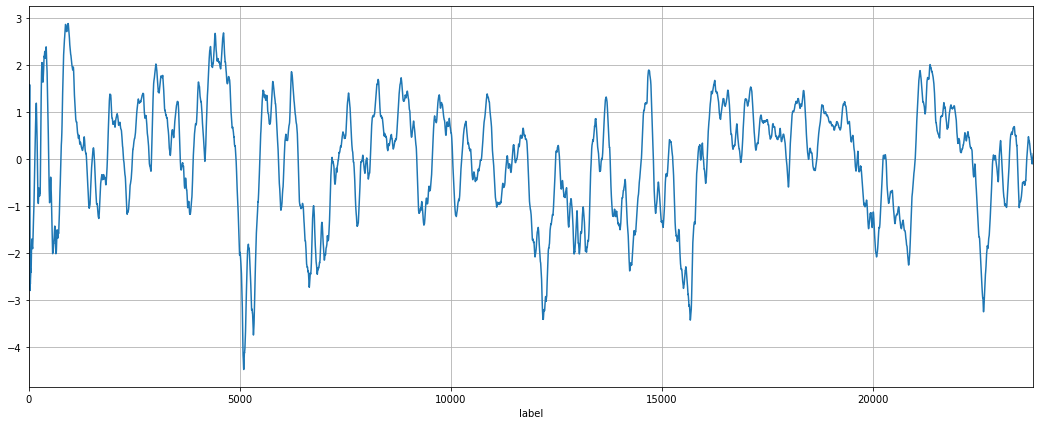

In [22]:
ema_diff['zscore'].plot(figsize=(18,7), grid=True);

In [23]:
def get_forecast(close, periods):
    ind = pd.DataFrame({'close': close})
    ind['max'] = ind.close.rolling(periods).max()
    ind['min'] = ind.close.rolling(periods).min()
    ind['mean'] = (ind['max'] + ind['min']) / 2
    ind['forecast'] = (ind['close'] - ind['mean']) / (ind['max'] - ind['min'])
    return ind

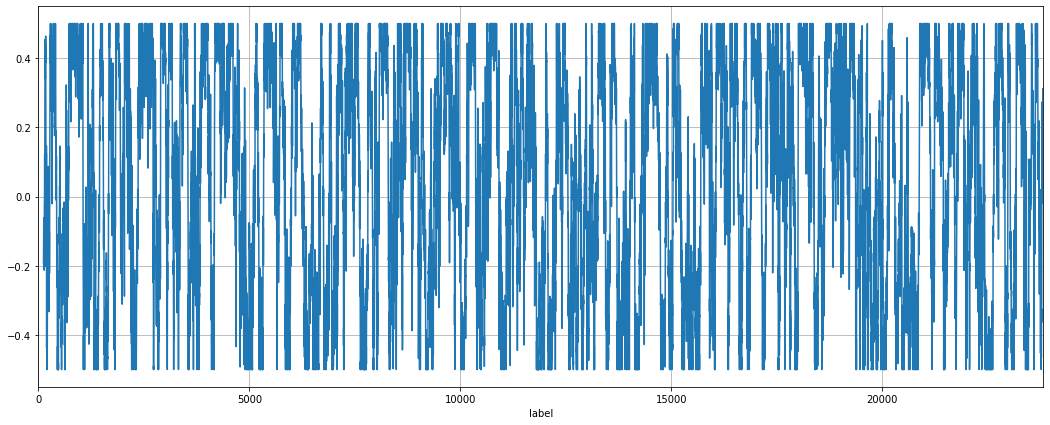

In [24]:
ind = get_forecast(data.close, 120)
ind.forecast.plot(figsize=(18,7), grid=True);

In [25]:
10 / ind.forecast.abs().mean()

33.45002867813958

In [26]:
10 / ema_diff.zscore.abs().mean()

10.156403252780615

In [27]:
10 / ema_diff.norm.abs().mean()

1.4349144674686223

In [28]:
ind['ind'] = ind['forecast'] * 40 + ema_diff['norm'] * 5.6

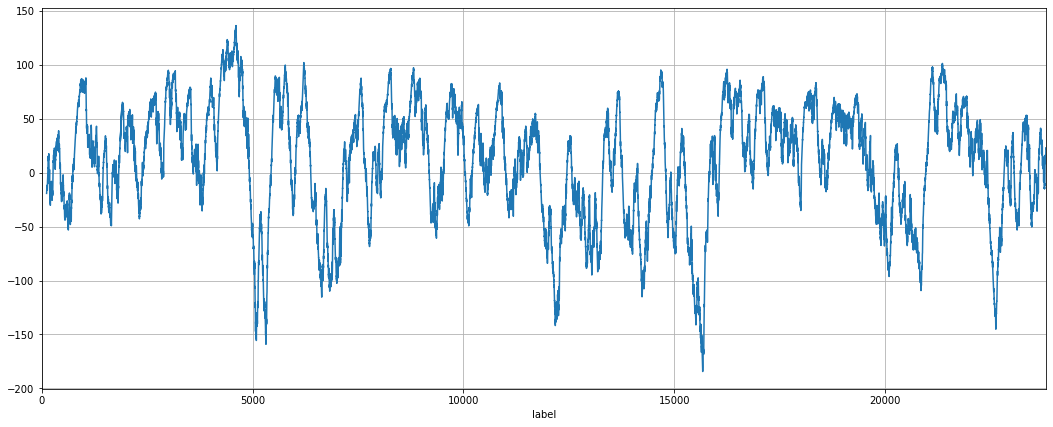

In [29]:
ind.ind.plot(figsize=(18, 7), grid=True);

In [30]:
norm_ind = pd.DataFrame({'breakout': ind['forecast'] * 40, 'ema_cross': ema_diff['norm'] * 5.6})
norm_ind['ema_cross'] = norm_ind['ema_cross'].clip(lower=-20, upper=20)
norm_ind['ema_cross_shift'] = norm_ind['ema_cross'].shift(20)
norm_ind.tail()

,breakout,ema_cross,ema_cross_shift
label,,,
23805,4.646465,9.768826,3.383354
23806,8.350168,10.024637,3.910640
23807,10.828924,10.317979,4.525426
23808,12.504638,10.608709,5.206457
23809,11.614100,10.868981,5.818915


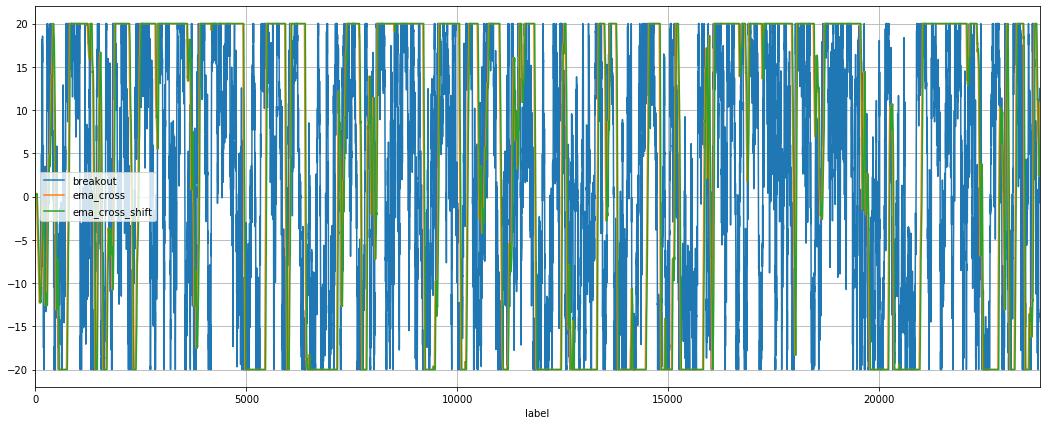

In [31]:
norm_ind.plot(figsize=(18,7), grid=True);

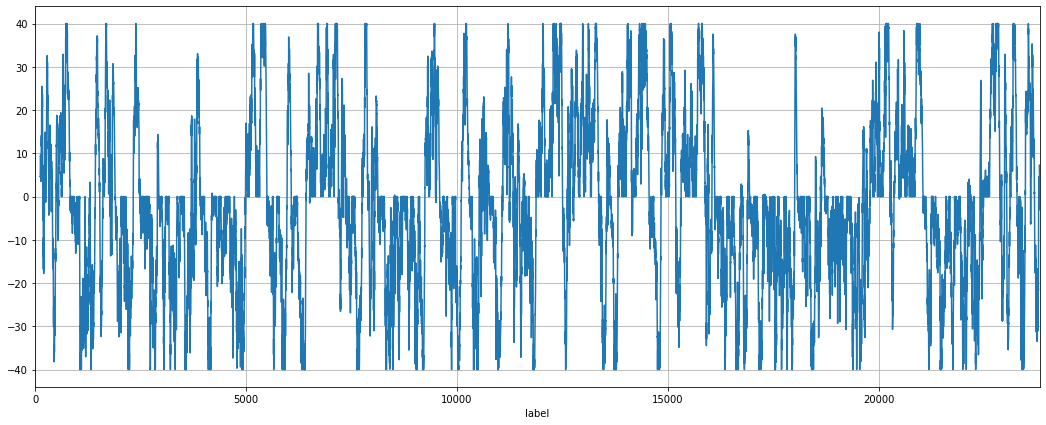

In [32]:
(norm_ind['breakout'] - norm_ind['ema_cross_shift']).plot(figsize=(18,7), grid=True);

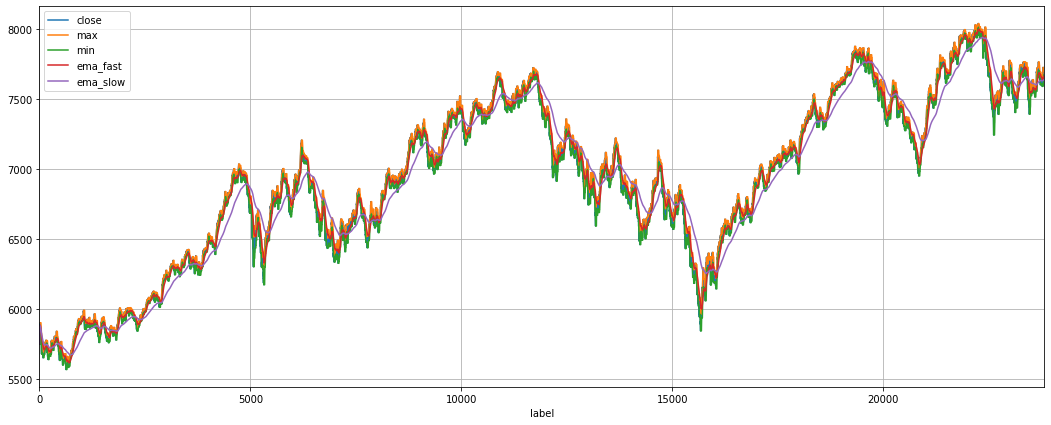

In [33]:
data.plot(figsize=(18,7), grid=True);

In [34]:
periods = [7, 15, 30, 120, 240, 480]

In [35]:
forecasts = pd.DataFrame()
for period in periods:
    forecasts[period] = get_forecast(data.close, period)['forecast']
forecasts.tail()

,7,15,30,120,240,480
label,,,,,,
23805,0.15625,-0.128319,0.127957,0.116162,0.169331,0.275401
23806,0.50000,0.358407,0.239514,0.208754,0.224276,0.312166
23807,0.50000,0.500000,0.270270,0.270723,0.240260,0.322861
23808,0.50000,0.500000,0.272523,0.312616,0.241259,0.323529
23809,0.37234,0.394737,0.240230,0.290353,0.229271,0.315508


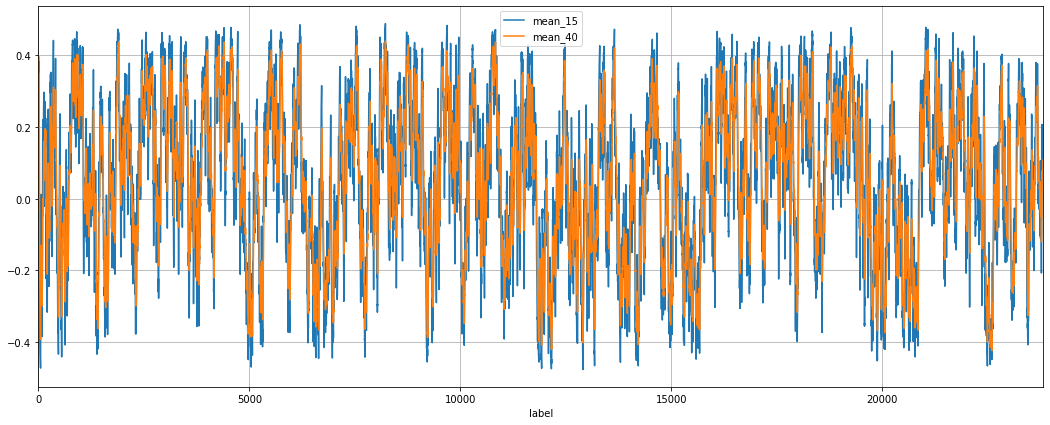

In [36]:
x = pd.DataFrame({'mean_15': forecasts.mean(axis=1).ewm(span=15).mean(),
                  'mean_40': forecasts.mean(axis=1).ewm(span=40).mean()
                  #'forecast': forecasts.mean(axis=1)
                 })
x.plot(figsize=(18,7),grid=True);

In [37]:
forecasts.corr()

,7,15,30,120,240,480
7,1.000000,0.813537,0.632547,0.360115,0.275790,0.203720
15,0.813537,1.000000,0.851974,0.514861,0.392783,0.288436
30,0.632547,0.851974,1.000000,0.677221,0.521614,0.382082
120,0.360115,0.514861,0.677221,1.000000,0.875300,0.682170
240,0.275790,0.392783,0.521614,0.875300,1.000000,0.866254
480,0.203720,0.288436,0.382082,0.682170,0.866254,1.000000


In [38]:
def get_emas(close, periods):
    ind = pd.DataFrame({'close': close})
    ind['ema_fast'] = close.ewm(span=periods[0]).mean()
    ind['ema_slow'] = close.ewm(span=periods[1]).mean()
    ind['diff'] = ind['ema_fast'] - ind['ema_slow']
    return ind

In [39]:
ema_pairs = [(60, 240), (120, 640), (360, 1120)]

In [40]:
emas = pd.DataFrame()
for pair in ema_pairs:
    emas[pair] = get_emas(data.close, pair)['diff']
emas.tail()

,"(60, 240)","(120, 640)","(360, 1120)"
label,,,
23805,15.567469,21.914670,-1.775698
23806,16.276548,22.381232,-1.560288
23807,17.050210,22.891131,-1.331414
23808,17.793779,23.393209,-1.103261
23809,18.428695,23.844015,-0.888035


In [41]:
emas.corr()

,"(60, 240)","(120, 640)","(360, 1120)"
"(60, 240)",1.000000,0.802222,0.419981
"(120, 640)",0.802222,1.000000,0.829900
"(360, 1120)",0.419981,0.829900,1.000000


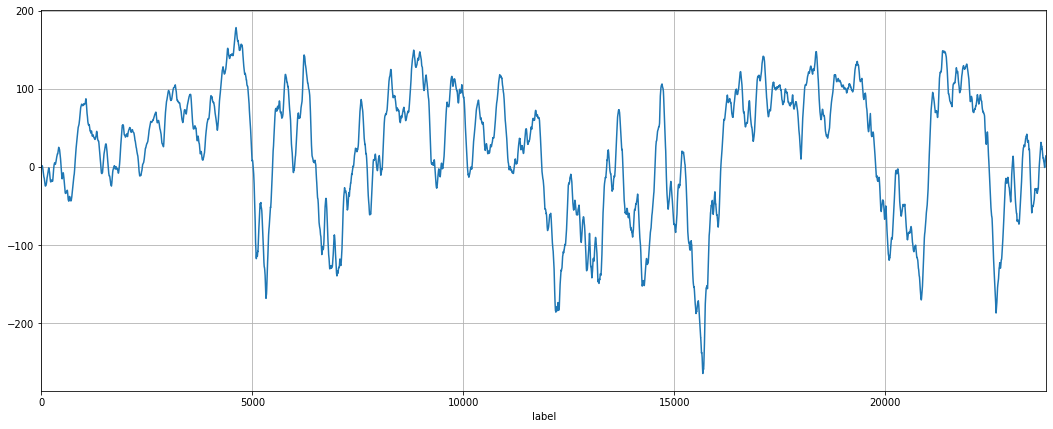

In [42]:
emas.mean(axis=1).plot(figsize=(18,7), grid=True);

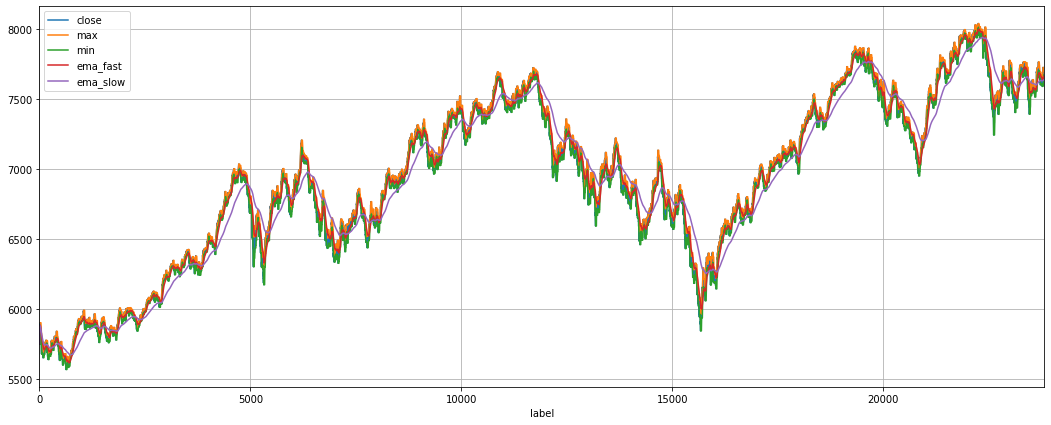

In [43]:
data.plot(figsize=(18,7), grid=True);

In [44]:
10/ emas.mean(axis=1).abs().mean()

0.14370799653298374

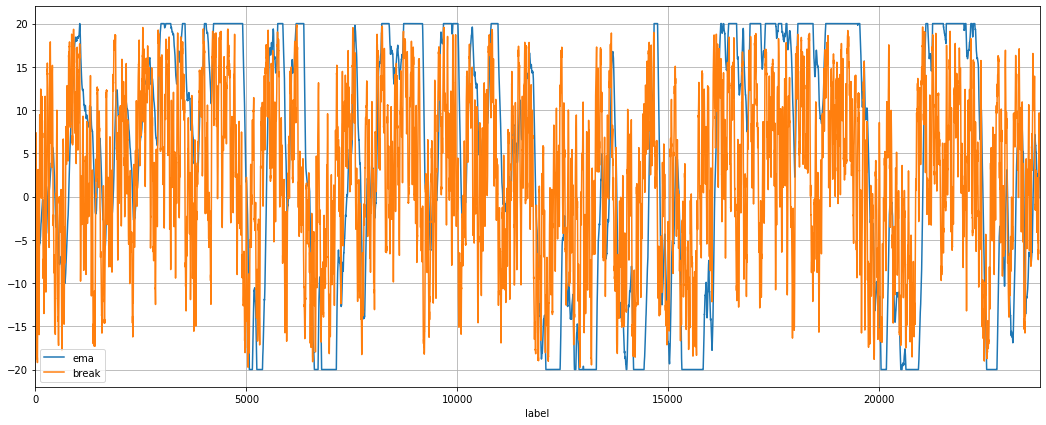

In [45]:
indices = pd.DataFrame({'ema': (emas.mean(axis=1) * .23).clip(lower=-20, upper=20),
                       'break': forecasts.mean(axis=1).rolling(15).mean() * 40
                       })
indices.plot(figsize=(18,7), grid=True);

In [46]:
indices.corr()

,ema,break
ema,1.000000,0.447316
break,0.447316,1.000000


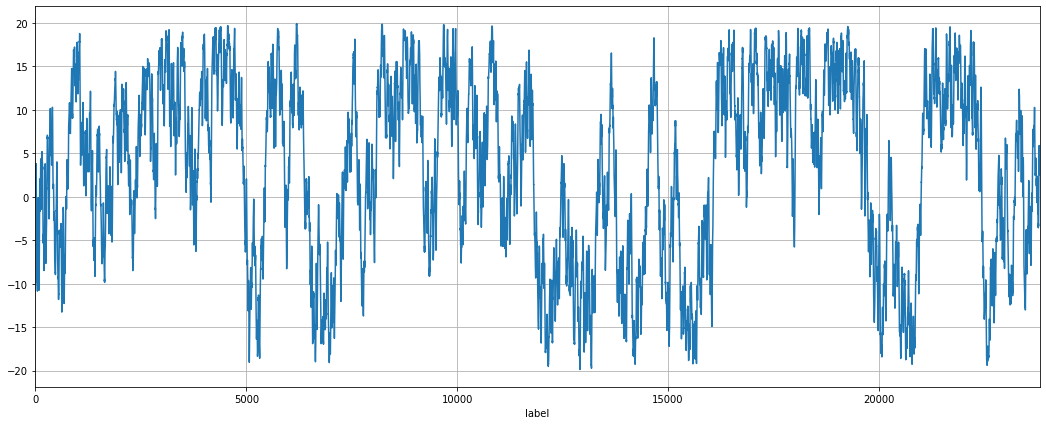

In [47]:
indices.mean(axis=1).plot(figsize=(18,7), grid=True);

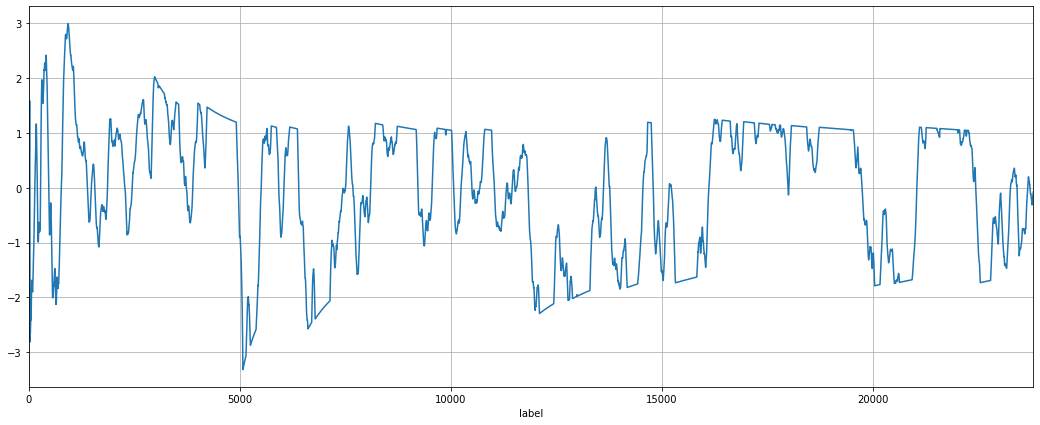

In [48]:
((indices['ema'] - indices['ema'].expanding().mean()) / indices['ema'].expanding().std()).plot(figsize=(18,7), grid=True);

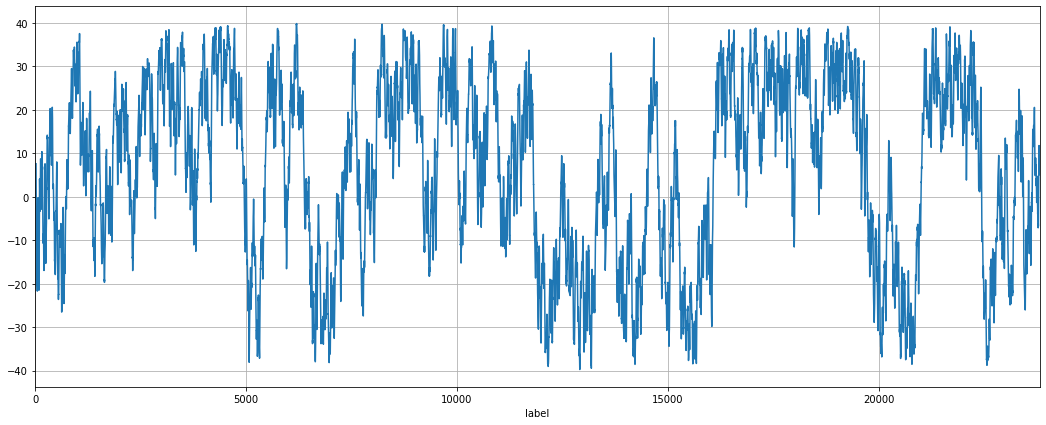

In [49]:
(indices['ema'] + indices['break']).plot(figsize=(18,7), grid=True);

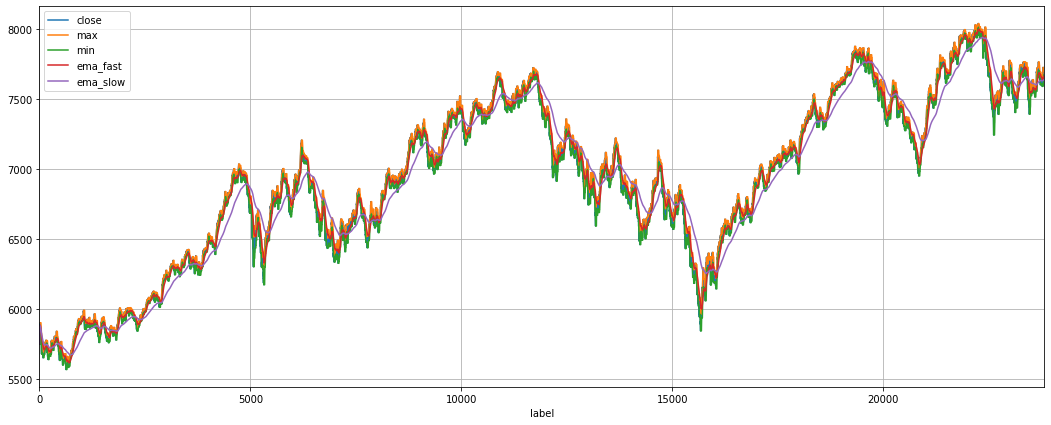

In [50]:
data.plot(figsize=(18,7), grid=True);

In [51]:
def get_ATR(data, periods):
    TR = pd.DataFrame({'A': (data['high'] - data['low']),
                       'B': (data['high'] - data['close']).abs(),
                       'C': (data['low'] - data['close']).abs()
                      })
    TR['TR'] = TR.max(axis=1)
    TR['ATR'] = TR['TR'].rolling(periods).mean()
    return TR.ATR

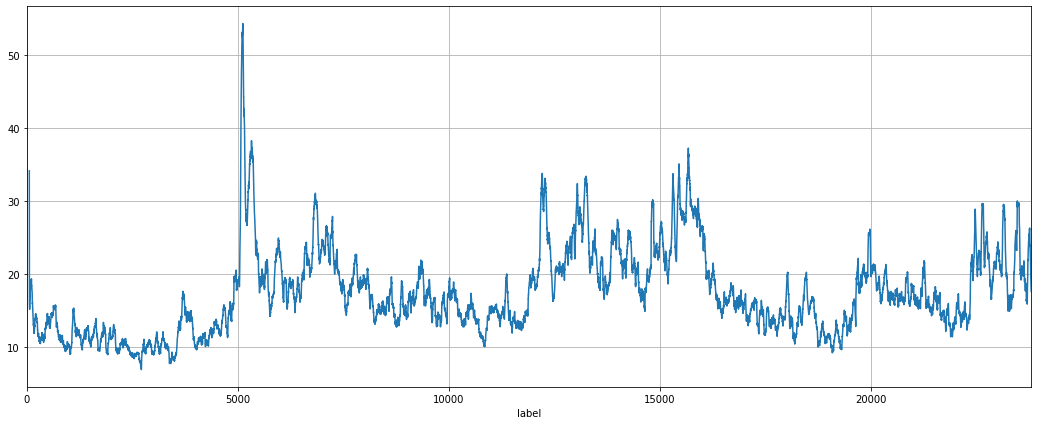

In [52]:
get_ATR(vol_candles, 60).plot(figsize=(18,7), grid=True);

In [53]:
periods = [20, 40, 80, 160, 320]

In [54]:
multi_period = pd.DataFrame({'close': data.close})

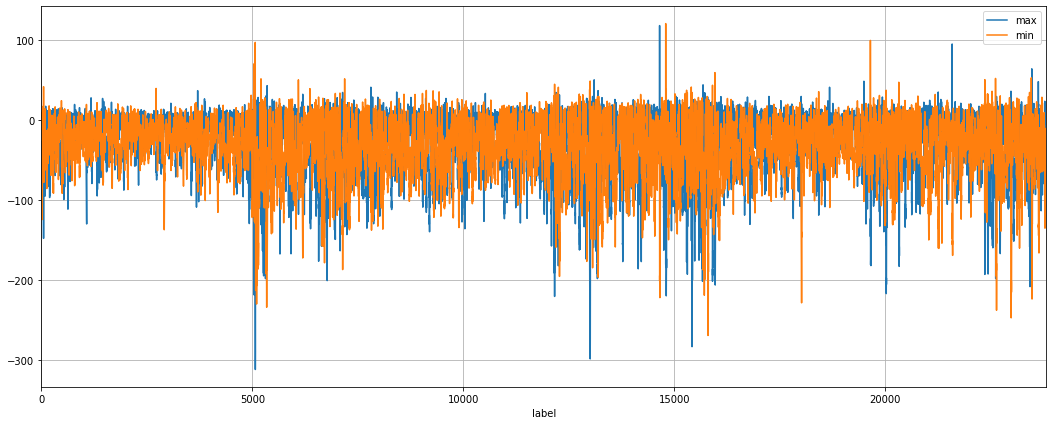

In [55]:
multi_period['max'] = multi_period.close - multi_period.close.shift(1).rolling(20).max()
multi_period['min'] = multi_period.close.shift(1).rolling(20).min() - multi_period.close
multi_period[['max', 'min']].plot(figsize=(18,7), grid=True);

In [56]:
from functools import partial

def get_min_max(data, period):
    return pd.DataFrame({
        'max': (data - data.shift(1).rolling(period).max()) > 0,
        'min': (data.shift(1).rolling(period).min() - data) > 0
    })

def majority_function(data):
    return (0.5 + ((data.sum(axis=1) - 0.5) / data.count(axis=1))).round(0)

def get_min_max_df(data, periods, func=get_min_max):
    min_max_func = partial(func, data)
    mins = pd.DataFrame()
    maxs = pd.DataFrame()
    for period in periods:
        df = min_max_func(period)
        mins[period] = df['min']
        maxs[period] = df['max']
    return {'min': mins,
           'max': maxs}

def get_signals(data, periods, func=get_min_max_df):
    min_max = func(data, periods)
    #return min_max['min']
    
    return pd.DataFrame({
        'signal': majority_function(min_max['max']) - majority_function(min_max['min'])
    })
    

In [57]:
get_signals(data.close, periods).tail()

,signal
label,
23805,0.0
23806,0.0
23807,0.0
23808,0.0
23809,0.0


In [58]:
signals = pd.DataFrame({
    'close': data.close,
    'signal': get_signals(data.close, periods)['signal']
})

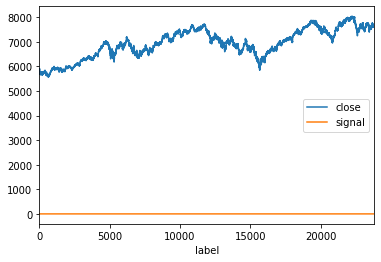

In [59]:
signals.plot();

In [60]:
signals['value'] = signals['close'] * signals['signal']

In [61]:
signals.tail()

,close,signal,value
label,,,
23805,7682.25,0.0,0.0
23806,7696.00,0.0,0.0
23807,7700.00,0.0,0.0
23808,7700.25,0.0,0.0
23809,7697.25,0.0,0.0


In [62]:
signals['value'] = signals.value.map(lambda x: x if x != 0 else np.nan)

In [63]:
signals['buy'] = signals['value'].map(lambda x: x if x > 0 else np.nan)
signals['sell'] = signals['value'].map(lambda x: -x if x < 0 else np.nan)

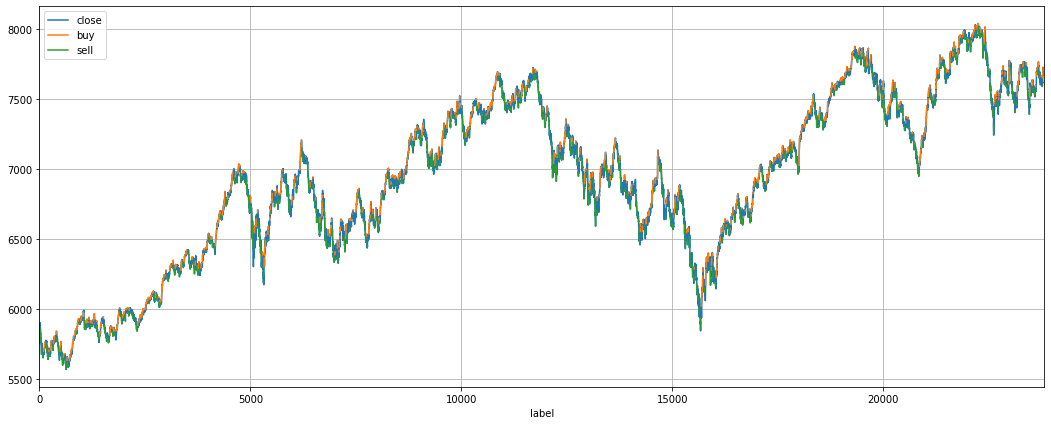

In [64]:
signals[['close', 'buy', 'sell']].plot(figsize=(18, 7), grid=True);

In [65]:
signals['cum_signal'] = signals.signal.expanding().apply(lambda x: x.sum().clip(min=-1, max=1), raw=False)

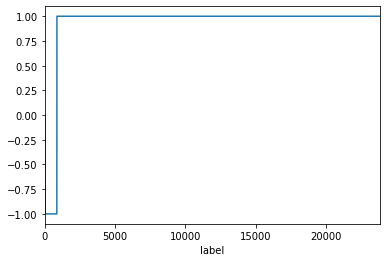

In [66]:
signals['cum_signal'].plot()

In [67]:
#signals['filter'] = np.sign(emas.mean(axis=1))
signals['filter'] = np.sign(data.close - data.ema_fast)
signals['atr'] = get_ATR(vol_candles, 80)

In [68]:
number_of_trades = 0
entry = 0
for row in signals.itertuples():
    if row.Index == 0:
        continue
    # if there's no position signal is to be filtered
    if signals.loc[row.Index-1, 'cum_signal'] == 0 and row.filter * row.signal != 1:
        signals.loc[row.Index, 'cum_signal'] = 0
        continue
    else:
        signals.loc[row.Index, 'cum_signal'] = (signals.loc[row.Index-1, 'cum_signal'] + row.signal).clip(max=1, min=-1)
        
    # create stop loss
    if signals.loc[row.Index, 'cum_signal'] - signals.loc[row.Index-1, 'cum_signal'] != 0:
        sl = signals.loc[row.Index, 'close'] - signals.loc[row.Index, 'cum_signal'] * signals.loc[row.Index, 'atr'] * 1
        signals.loc[row.Index, 'sl'] = sl
    if not signals.loc[row.Index, 'sl']:
        signals.loc[row.Index, 'sl'] = signals.loc[row.Index-1, 'sl']
        
    # apply stop loss
    if signals.loc[row.Index, 'cum_signal'] == 1 and signals.loc[row.Index, 'close'] < sl:
        signals.loc[row.Index, 'cum_signal'] = 0
    elif signals.loc[row.Index, 'cum_signal'] == -1 and signals.loc[row.Index, 'close'] > sl:
        signals.loc[row.Index, 'cum_signal'] = 0
        
    # count trades
    if signals.loc[row.Index, 'cum_signal'] != signals.loc[row.Index-1, 'cum_signal']:
        number_of_trades += 1

In [69]:
signals.tail()

,close,signal,value,buy,sell,cum_signal,filter,atr,sl
label,,,,,,,,,
23805,7682.25,0.0,NaN,NaN,NaN,1.0,1.0,21.562500,NaN
23806,7696.00,0.0,NaN,NaN,NaN,1.0,1.0,21.434375,NaN
23807,7700.00,0.0,NaN,NaN,NaN,1.0,1.0,20.471875,NaN
23808,7700.25,0.0,NaN,NaN,NaN,1.0,1.0,19.996875,NaN
23809,7697.25,0.0,NaN,NaN,NaN,1.0,1.0,19.628125,NaN


In [70]:
signals['value'] = signals['close'] * signals['cum_signal']
signals['value'] = signals.value.map(lambda x: x if x != 0 else np.nan)
signals['long'] = signals['value'].map(lambda x: x if x > 0 else np.nan)
signals['short'] = signals['value'].map(lambda x: -x if x < 0 else np.nan)

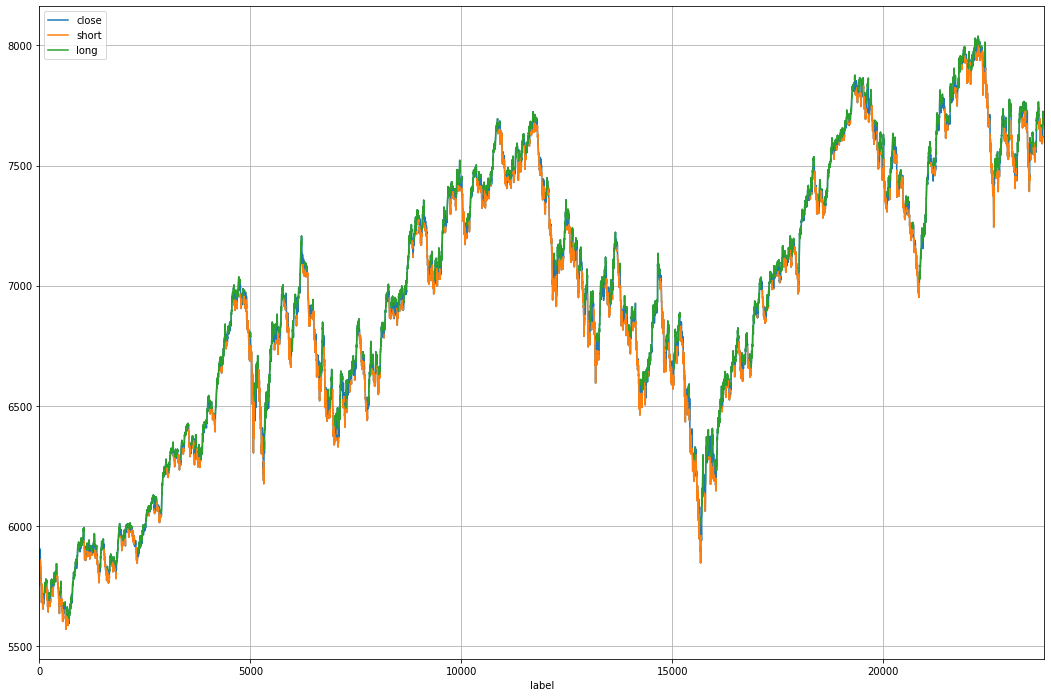

In [71]:
signals[['close', 'short', 'long']].plot(figsize=(18, 12), grid=True);

In [72]:
#signals.tail(200)

In [73]:
signals.head()

,close,signal,value,buy,sell,cum_signal,filter,atr,sl,long,short
label,,,,,,,,,,,
0,5754.50,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,5877.25,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
2,5883.75,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
3,5895.25,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
4,5875.75,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN


In [74]:
signals['long_pnl'] = signals.long.diff().fillna(0)
signals['short_pnl'] = - signals.short.diff().fillna(0)

In [75]:
long_pnl = signals.long_pnl.sum()
short_pnl = signals.short_pnl.sum()
pnl = long_pnl + short_pnl
long_pnl, short_pnl, pnl

(8824.25, 6732.5, 15556.75)

fast filter: 773 (980 with 60minute volumes)
slow filter: 404

In [76]:
signals['pnl'] = signals['long_pnl'] + signals['short_pnl']
pnl_p = signals[signals['pnl']>0].pnl
pnl_m = signals[signals['pnl']<0].pnl
pnl_p.count(), pnl_m.count(), pnl_p.count()/(pnl_p.count()+pnl_m.count())

(8847, 7623, 0.5371584699453552)

In [77]:
pnl_p.sum(), pnl_m.sum(), pnl_p.sum()/ pnl_m.abs().sum()

(78697.25, -63140.5, 1.2463830663361868)

In [78]:
signals['date'] = vol_candles['date']

In [79]:
signals.set_index('date', inplace=True)

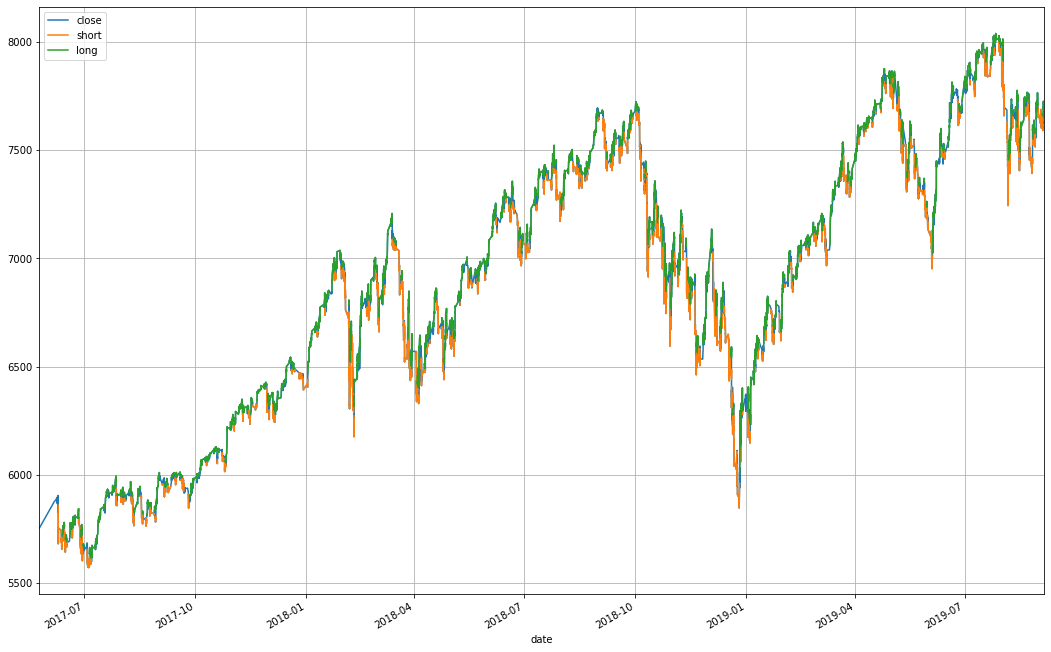

In [80]:
signals[['close', 'short', 'long']].plot(figsize=(18, 12), grid=True);

In [81]:
signals.tail()

,close,signal,value,buy,sell,cum_signal,filter,atr,sl,long,short,long_pnl,short_pnl,pnl
date,,,,,,,,,,,,,,
2019-09-04 17:16:00,7682.25,0.0,7682.25,NaN,NaN,1.0,1.0,21.562500,NaN,7682.25,NaN,0.25,-0.0,0.25
2019-09-04 17:31:00,7696.00,0.0,7696.00,NaN,NaN,1.0,1.0,21.434375,NaN,7696.00,NaN,13.75,-0.0,13.75
2019-09-04 17:47:00,7700.00,0.0,7700.00,NaN,NaN,1.0,1.0,20.471875,NaN,7700.00,NaN,4.00,-0.0,4.00
2019-09-04 18:14:00,7700.25,0.0,7700.25,NaN,NaN,1.0,1.0,19.996875,NaN,7700.25,NaN,0.25,-0.0,0.25
2019-09-04 18:31:00,7697.25,0.0,7697.25,NaN,NaN,1.0,1.0,19.628125,NaN,7697.25,NaN,-3.00,-0.0,-3.00


In [82]:
daily = pd.DataFrame()
daily['close'] = signals['close'].resample('D').last()
daily['pnl'] = (signals['long_pnl'] + signals['short_pnl']).resample('D').sum()
daily.tail()

,close,pnl
date,,
2019-08-31,NaN,0.00
2019-09-01,NaN,0.00
2019-09-02,7618.00,57.75
2019-09-03,7614.50,-39.50
2019-09-04,7697.25,40.00


In [83]:
daily['dollars'] = 0
daily.iloc[0,2] = 25000

In [84]:
daily.head()

,close,pnl,dollars
date,,,
2017-05-25,5754.5,0.0,25000
2017-05-26,NaN,0.0,0
2017-05-27,NaN,0.0,0
2017-05-28,NaN,0.0,0
2017-05-29,NaN,0.0,0


In [85]:
multiplier = 20

In [86]:
daily['dollars'] = 25000 + daily.pnl.cumsum() * multiplier

In [87]:
daily.tail()

,close,pnl,dollars
date,,,
2019-08-31,NaN,0.00,334970.0
2019-09-01,NaN,0.00,334970.0
2019-09-02,7618.00,57.75,336125.0
2019-09-03,7614.50,-39.50,335335.0
2019-09-04,7697.25,40.00,336135.0


In [88]:
daily['return'] = daily.dollars.pct_change()

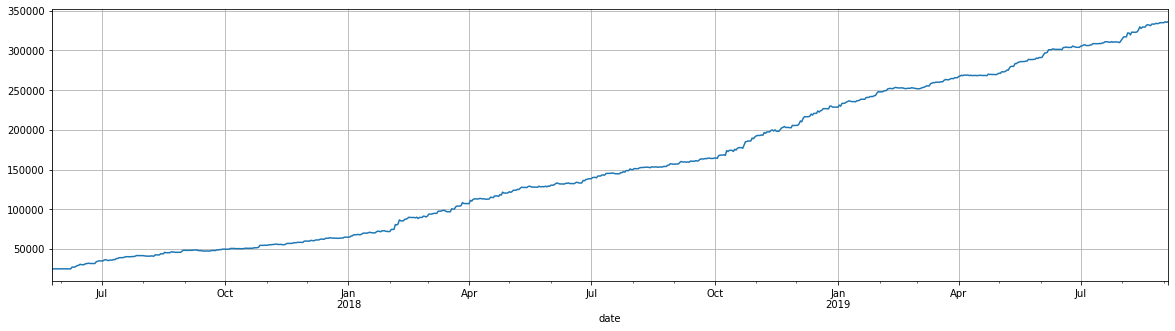

In [89]:
daily.dollars.plot(figsize=(20,5), grid=True);

In [90]:
daily.tail()

,close,pnl,dollars,return
date,,,,
2019-08-31,NaN,0.00,334970.0,0.000000
2019-09-01,NaN,0.00,334970.0,0.000000
2019-09-02,7618.00,57.75,336125.0,0.003448
2019-09-03,7614.50,-39.50,335335.0,-0.002350
2019-09-04,7697.25,40.00,336135.0,0.002386


In [91]:
from pyfolio.timeseries import perf_stats

/home/tomek/ib_insync/.env/lib/python3.6/site-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [92]:
perf_stats(daily['return'])

Annual return           1.194913
Cumulative returns     12.445400
Annual volatility       0.151815
Sharpe ratio            5.266617
Calmar ratio           37.184668
Stability               0.968293
Max drawdown           -0.032135
Omega ratio             4.491616
Sortino ratio          20.743859
Skew                         NaN
Kurtosis                     NaN
Tail ratio              3.418608
Daily value at risk    -0.015954
dtype: float64

In [93]:
(daily['return'] + 1).product()

13.445400000000035

In [94]:
number_of_trades

1659

In [95]:
spread = .25 * multiplier
commission = 1.18 + .85 
cost_of_trades = number_of_trades * (spread + commission)
cost_of_trades

11662.769999999999

In [96]:
days = (daily.index[-1] - daily.index[0]).days #pd.to_datetime('20190613')).days
days

832

In [97]:
trades_per_day = number_of_trades / days
trades_per_day

1.9939903846153846

In [98]:
pnl_in_dollars = pnl*multiplier

In [99]:
cost_of_trades / (pnl_in_dollars)

0.037484596718466254

In [100]:
mean = daily['return'].mean() * 252
std = daily['return'].std() * (252**.5)
mean, std

(0.7995514284691259, 0.15181500779390206)

In [101]:
mean/std

5.266616522883987